In [1]:
import pandas as pd 
from transformers import pipeline

2024-05-09 17:10:12.177541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
data=r"Health_and_Personal_Care.jsonl"
data=pd.read_json(data,lines=True)

In [6]:
data.shape

(494121, 10)

In [8]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True


In [9]:
data.isnull().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [11]:
def label_sentiment(rating):
    if rating in range(1, 3):  # Ratings 1 and 2 are "Negative"
        return "Negative"
    elif rating == 3:  # Rating 3 is "Neutral"
        return "Neutral"
    elif rating in range(4, 6):  # Ratings 4 and 5 are "Positive"
        return "Positive"
    else:
        return None  # Handle cases outside the 1-5 range

# Assuming 'merged_data' is a DataFrame and 'rating' is a column containing ratings
data['Sentiment'] = data['rating'].apply(label_sentiment)


In [12]:
data[['rating', 'Sentiment']].sample(5)

,rating,Sentiment
469399,5,Positive
33915,5,Positive
50077,5,Positive
206226,3,Neutral
199228,5,Positive


In [14]:
neutral_reviews = data[data['Sentiment'] == 'Neutral']

# Count the occurrences of each value in the DataFrame
value_counts = neutral_reviews['Sentiment'].value_counts()

print(value_counts)

Neutral    36949
Name: Sentiment, dtype: int64


In [16]:
negative_reviews = data[data['Sentiment'] == 'Negative']

# Count the occurrences of each value in the DataFrame
value_counts = negative_reviews['Sentiment'].value_counts()

print(value_counts)

Negative    98459
Name: Sentiment, dtype: int64


In [17]:
positive_reviews = data[data['Sentiment'] == 'Positive']

# Count the occurrences of each value in the DataFrame
value_counts = positive_reviews['Sentiment'].value_counts()

print(value_counts)

Positive    358713
Name: Sentiment, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

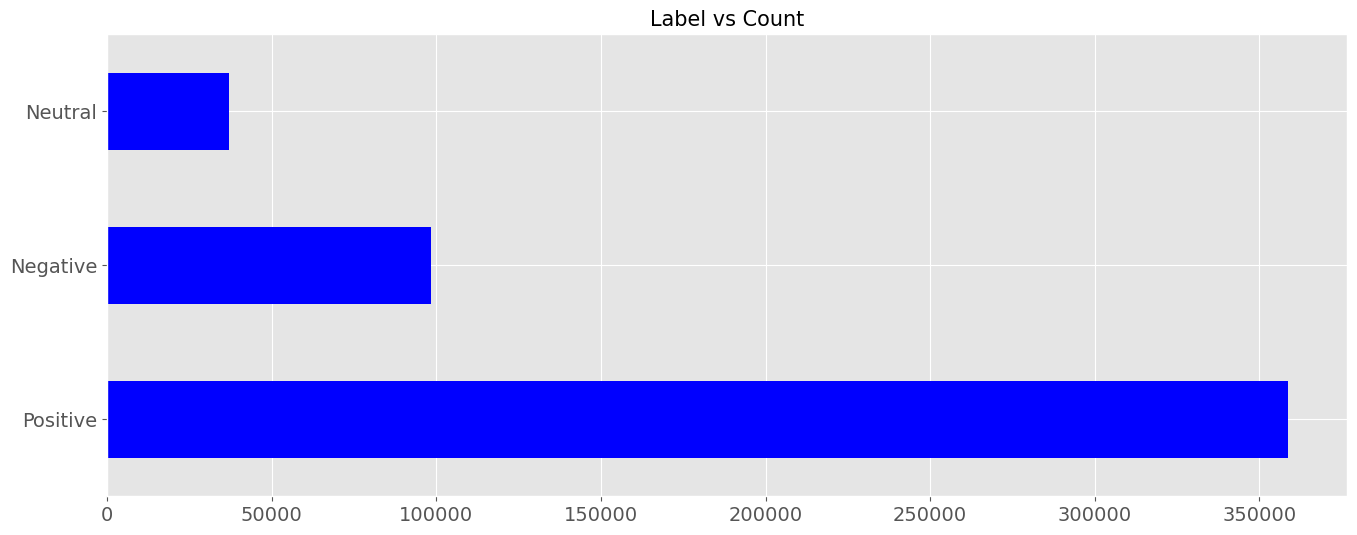

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [24]:
import pandas as pd
# Extract separate DataFrames for each sentiment category
neutral_data = data[data['Sentiment'] == 'Neutral']
positive_data = data[data['Sentiment'] == 'Positive']
negative_data = data[data['Sentiment'] == 'Negative']

# Find the minimum count among all sentiment categories
min_count = min(len(neutral_data), len(positive_data), len(negative_data))

# Downsample the positive sentiment data
positive_sampled = positive_data.sample(n=min_count, random_state=42)

# Upsample the neutral and negative sentiment data
neutral_sampled = neutral_data.sample(n=min_count, replace=True, random_state=42)
negative_sampled = negative_data.sample(n=min_count, replace=True, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([positive_sampled, neutral_sampled, negative_sampled])

# Shuffle the balanced data
merged_data= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Now you have a balanced data containing equal counts of each sentiment category

In [25]:
data['Sentiment'].value_counts()

Positive    358713
Negative     98459
Neutral      36949
Name: Sentiment, dtype: int64

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

import pickle

In [30]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)
print(negative_stop_words)

final_stopwords = total_stopwords - negative_stop_words
print('\n\n')
# 
final_stopwords.add("one")
print(final_stopwords)

{"wasn't", "hasn't", "mustn't", "wouldn't", "hadn't", "couldn't", "shan't", 'nor', "didn't", "doesn't", "weren't", "aren't", "needn't", "mightn't", "won't", "isn't", "don't", "shouldn't", 'not', "haven't", 'now', 'no'}



{'yours', 'because', 'to', 'was', 'own', 'hasn', 'again', 'will', 'ma', 'can', 'in', 'most', 'than', 'where', 'weren', 'herself', 'this', 'just', 'into', 'but', 'hadn', 'yourself', 'does', 'wouldn', 'about', 'some', 'our', 'he', 'on', 'll', 'doing', 'ours', 'one', 'until', 'doesn', 'what', 'the', 'out', 'yourselves', 'mustn', 'who', 'all', 'when', 't', 'it', 'should', 'below', 'myself', "it's", 'did', 'through', "she's", 're', 'whom', 'once', 'is', 'o', 'we', 'isn', 'against', 'hers', 'its', 'ourselves', 'from', 's', 'be', 'after', 'has', 'these', 'theirs', 'them', 'if', 'being', 'only', 'up', 'for', 'shan', 'me', 'each', 'y', 'other', 'aren', 'any', 'same', 'having', 'didn', 'haven', 'while', 'both', 'his', 'itself', 'that', 'which', 'do', 'more', 'i', 'themselves', 

In [31]:
#stemming object
stemmer = PorterStemmer()

HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")


In [32]:
def preprocessor(text):
    # remove html tags
    text = HTMLTAGS.sub(r'', text)

    # remove puncutuation
    text = text.translate(table)
    
    # remove digits
    text = text.translate(remove_digits)
    
    # lower case all letters
    text = text.lower()
    
    # replace multiple white spaces with single space
    text = MULTIPLE_WHITESPACE.sub(" ", text).strip()
    
    # remove stop words
    text = [word for word in text.split()
              if word not in final_stopwords]
    
    # stemming
    text = ' '.join([stemmer.stem(word) for word in text])
    
    return text

In [33]:
print("Before preprocessing : ")
data.text.iloc[6]

Before preprocessing : 


"To be honest, my husband did not use this for a balding head. He wanted to try it for his face and for nose/ear hairs. This is his review. This was a nice man's shaver. It has several attachments which are easy to change out and install. The shave I got was super close and it was easy to maneuver it over the contours of my face. I have to admit it is one of the best shaves I have had in the past few years and for the money it is a good deal. The nose trimmer worked well with no pain or irritation. Highly recommend."

In [34]:
data.text = data.text.apply(preprocessor) 
print("After preprocessing : ")
data.text.iloc[6]

After preprocessing : 


'honest husband not use bald head want tri face noseear hair review nice man shaver sever attach easi chang instal shave got super close easi maneuv contour face admit best shave past year money good deal nose trimmer work well no pain irrit highli recommend'

In [35]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
##from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
##from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
##from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

In [36]:
x = data.text
y = data.Sentiment

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)

In [39]:
x_train.shape, x_test.shape

((395296,), (98825,))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(x_train)

# transform
bow_x_train = bow_vectorizer.transform(x_train)
bow_x_test = bow_vectorizer.transform(x_test)

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)

# transform
tfidf_x_train = tfidf_vectorizer.transform(x_train)
tfidf_x_test = tfidf_vectorizer.transform(x_test)

In [43]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [59]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(log_model, bow_x_train, y_train, bow_x_test, y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.8117714320407998
Test accuracy score : 0.8110194788768025

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.8403550756901158
Test accuracy score : 0.8358006577283076

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.8521740670282523
Test accuracy score : 0.8417505691879585

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.8581999311908038
Test accuracy score : 0.8410422463951429

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.859973285841496
Test accuracy score : 0.8392410827219833

 ----------------------------------------


In [48]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(nb_model,bow_x_train,y_train,bow_x_test,y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.8240533676030114
Test accuracy score : 0.8161699974702757

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.8229149801667611
Test accuracy score : 0.8159271439413104

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8224191491945276
Test accuracy score : 0.8158765494561093

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8224242086942443
Test accuracy score : 0.816089046293954

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.8223204889500526
Test accuracy score : 0.8161598785732355

 ----------------------------------------


In [49]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_x_train,
                   trainY=y_train,
                   testX=tfidf_x_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.7443080628187485
Test accuracy score : 0.7438300025297243

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.8217158787339108
Test accuracy score : 0.8210877814318239

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.8489789929571764
Test accuracy score : 0.8458588413862889

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.8591511171375374
Test accuracy score : 0.8501087781431824

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.8632417226584636
Test accuracy score : 0.8472350113837591

 ----------------------------------------


In [50]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_x_train,
                   trainY=y_train,
                   testX=tfidf_x_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.811637355298308
Test accuracy score : 0.8073362003541614

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.8112300655711163
Test accuracy score : 0.807366557045282

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8104863191127661
Test accuracy score : 0.8065064507968631

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8100486723872743
Test accuracy score : 0.8060511004300531

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.8095806686634825
Test accuracy score : 0.8057880091070073

 ----------------------------------------


In [51]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [52]:
bmodel = LogisticRegression(C=c, max_iter=500, random_state=1)
bmodel.fit(bow_x_train, y_train)

LogisticRegression(C=10, max_iter=500, random_state=1)

In [53]:
y_preds_train = bmodel.predict(bow_x_train)
y_preds_test = bmodel.predict(bow_x_test)

In [54]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.859973285841496
Test accuracy score : 0.8392410827219833


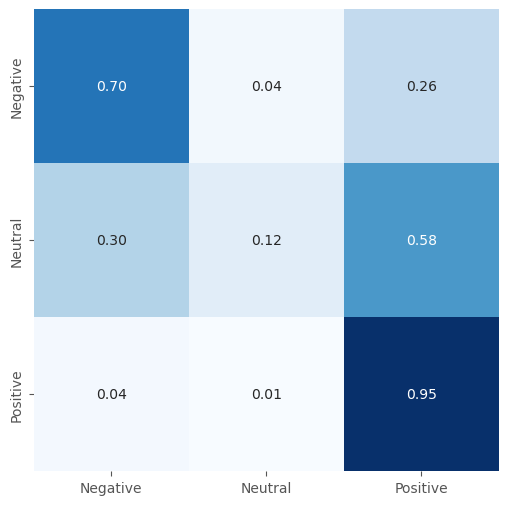

In [55]:
plot_cm(y_test, y_preds_test)

In [56]:
import pickle
with open("transformer.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [57]:
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [58]:
review="I have been suffering a couple months with heel pain from plantar fasciitis.  I thought I'd give these a try and wow, I was surprised at how much they cut down on the pain.  I wish they came in a tighter and thicker version."
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [64]:
data2=r"Health_and_Personal_Care.jsonl"
data2=pd.read_json(data2,lines=True)
data2=data2.head(500)

In [65]:
data.sentiment=data2['text'].apply(get_sentiment)

In [67]:
data.sentiment

0      Positive
1      Positive
2      Positive
3      Negative
4      Negative
         ...   
495    Positive
496    Positive
497    Positive
498    Positive
499    Positive
Name: text, Length: 500, dtype: object

In [68]:
data2['text'].iloc[0]

'This review is more to clarify someone else’s review bc they didn’t understand understand the labeling!  It shows 1000mg as advertised & another little label says 12mg bc 12 is on the periodic table for magnesium!  I realize not everyone takes chemistry, but 4 ppl liked his review & so misinformation is spreading.  This works. If however you are on opiate level medications that are causing constipation you should talk to your pain dr or your gastrointestinal dr & ask for a medication called Linzess which works must better & must faster, but is unnecessary for most people.  If magnesium is working for you just make sure to take it with food & drink 6-8 glasses of water per day.  Staying hydrated will really help.  Before switching to Linzess I used to take one 1,000 mg pill am & pm every day with meals & always with an 8 ounce glass of water or other liquid.'

In [ ]:
# Hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Define different values for n_estimators
n_estimators = [50, 100, 200, 300]

for n in n_estimators: 
    # Define model
    rf_model = RandomForestClassifier(n_estimators=n, random_state=1)
    
    # Train and evaluate model
    train_and_eval(rf_model, bow_x_train, y_train, bow_x_test, y_test)


RandomForestClassifier(n_estimators=50, random_state=1)
Train accuracy score : 0.9934378288674816
Test accuracy score : 0.8408499873513787

 ----------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with a specific value of n_estimators
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the Random Forest model to the training data
rf_model.fit(bow_x_train, y_train)